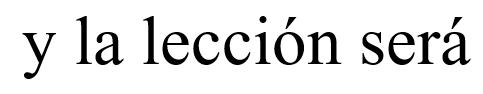

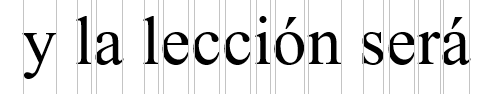

[23, 56, 77, 91, 96, 122, 144, 158, 163, 188, 194, 219, 225, 250, 256, 270, 275, 304, 308, 341, 363, 383, 389, 414, 418, 440, 443, 469]


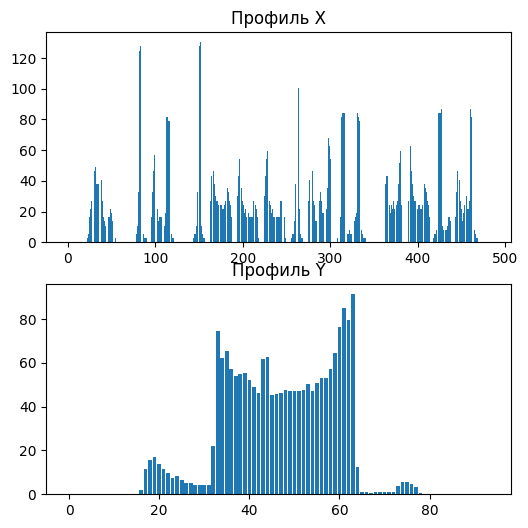

In [108]:
from itertools import count
from PIL import Image, ImageDraw, ImageFont
import csv
import numpy as np
import matplotlib.pyplot as plt

def profiles(image_path):
    image = np.asarray(Image.open(image_path).convert('L'))
    img_res = np.zeros_like(image)
    Image.fromarray(np.uint8(image)).show()


   
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
          if (image[i][j].all() == 0):
            img_res[i][j] = 255


    #Вычисляем профили X и Y изображения
    profile_x = np.mean(img_res, axis=0)
    profile_y = np.mean(img_res, axis=1)

    crd_lines = []


    for i in range(1, len(profile_x) - 1):
      if ((abs(profile_x[i] - profile_x[i-1]) > 0.01) and (profile_x[i] <= 1 or profile_x[i-1] == 0)):
        crd_lines.append(i)

        for j in range(image.shape[0]):
          image[j][i] =	2500
    Image.fromarray(np.uint8(image)).show()

    print(crd_lines)




    # Строим диаграммы профилей
    fig, axes = plt.subplots(nrows=2, figsize=(6, 6))
    axes[0].bar(range(len(profile_x)), profile_x)
    axes[0].set_title('Профиль X')
    axes[1].bar(range(len(profile_y)), profile_y)
    axes[1].set_title('Профиль Y')

    # Сохраняем диаграмму в файл PNG
    fig.savefig('profiles.png')

profiles('/content/Spanish3.png')
